![](_fig/labeled.jpg)

# PyStudio 2: Building a Model

## Finding Value: Predicting Performance on Value Based Payments from CMS Hospital Compare Data

### Setup Workspace

In [12]:
import os
import pandas as pd
import numpy as np

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [14]:
os.chdir("/home/drewc/allocativ/py4hc")

In [15]:
df_cms = pd.read_csv("_data/cms.csv")

In [16]:
df_cms.info()
df_cms.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Columns: 178 entries, Facility ID to Track Electronic Labs
dtypes: float64(152), int64(25), object(1)
memory usage: 3.1+ MB


,Facility ID,FIPS,2018 VBP Adjustment Factor,2019 VBP Adjustment Factor,2020 VBP Adjustment Factor,READM-30-AMI-HRRP,READM-30-CABG-HRRP,READM-30-COPD-HRRP,READM-30-HF-HRRP,READM-30-HIP-KNEE-HRRP,...,Efficient use of medical imaging national comparison Above Average,Mortality national comparison Below Average,Safety of care national comparison Below Average,Readmission national comparison Below Average,Patient experience national comparison Below Average,Effectiveness of care national comparison Below Average,Timeliness of care national comparison Below Average,Efficient use of medical imaging national comparison Below Average,Receive Electronic Labs,Track Electronic Labs
0,100001,FIPS12031,0.997517,1.002304,0.997413,1.0685,0.9213,1.0591,1.0757,1.1851,...,0,0,0,1,0,1,1,1,1,1
1,100002,FIPS12099,0.995494,0.996971,0.991655,0.9468,0.8829,1.0612,1.0224,0.7993,...,0,0,0,1,1,0,0,0,1,1
2,100006,FIPS12095,0.995280,0.996284,0.994979,0.9460,1.0253,1.0125,1.0152,1.2449,...,1,0,0,1,0,0,0,0,1,1
3,100007,FIPS12095,1.005295,1.007495,1.007056,1.0062,1.3440,0.9761,1.0807,1.1310,...,1,0,1,1,0,0,1,0,1,1
4,100008,FIPS12086,0.995473,0.993890,0.996734,0.9415,0.9824,1.0537,0.9574,0.8431,...,1,0,1,1,0,0,1,0,1,1


### Process Data

In [17]:
df_cms = df_cms.filter([
    "Rate of readmission hospital wide",
    "READM-30-AMI-HRRP",
    "READM-30-CABG-HRRP",
    "READM-30-COPD-HRRP",
    "READM-30-HF-HRRP",
    "READM-30-HIP-KNEE-HRRP",
    "READM-30-PN-HRRP",
    "2020 VBP Adjustment Factor"])

In [18]:
df_cms = df_cms.dropna()

In [19]:
df_cms.info()
df_cms.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 2264
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rate of readmission hospital wide  746 non-null    float64
 1   READM-30-AMI-HRRP                  746 non-null    float64
 2   READM-30-CABG-HRRP                 746 non-null    float64
 3   READM-30-COPD-HRRP                 746 non-null    float64
 4   READM-30-HF-HRRP                   746 non-null    float64
 5   READM-30-HIP-KNEE-HRRP             746 non-null    float64
 6   READM-30-PN-HRRP                   746 non-null    float64
 7   2020 VBP Adjustment Factor         746 non-null    float64
dtypes: float64(8)
memory usage: 52.5 KB


,Rate of readmission hospital wide,READM-30-AMI-HRRP,READM-30-CABG-HRRP,READM-30-COPD-HRRP,READM-30-HF-HRRP,READM-30-HIP-KNEE-HRRP,READM-30-PN-HRRP,2020 VBP Adjustment Factor
0,16.0,1.0685,0.9213,1.0591,1.0757,1.1851,1.0149,0.997413
1,15.8,0.9468,0.8829,1.0612,1.0224,0.7993,1.0040,0.991655
2,15.4,0.9460,1.0253,1.0125,1.0152,1.2449,0.8895,0.994979
3,16.1,1.0062,1.3440,0.9761,1.0807,1.1310,1.1468,1.007056
4,15.3,0.9415,0.9824,1.0537,0.9574,0.8431,1.0211,0.996734


### Create Model

In [20]:
x = df_cms.drop(columns = "2020 VBP Adjustment Factor")
y = df_cms["2020 VBP Adjustment Factor"]

In [21]:
MLR = sm.OLS(y, x).fit()

In [23]:
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     2020 VBP Adjustment Factor   R-squared (uncentered):                   0.997
Model:                                    OLS   Adj. R-squared (uncentered):              0.997
Method:                         Least Squares   F-statistic:                          3.860e+04
Date:                        Fri, 21 Aug 2020   Prob (F-statistic):                        0.00
Time:                                08:03:11   Log-Likelihood:                          1144.4
No. Observations:                         746   AIC:                                     -2275.
Df Residuals:                             739   BIC:                                     -2242.
Df Model:                                   7                                                  
Covariance Type:                    nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Rate of readmission hospital wide     0.0248      0.002     10.044      0.000       0.020       0.030
READM-30-AMI-HRRP                     0.1536      0.030      5.042      0.000       0.094       0.213
READM-30-CABG-HRRP                    0.0729      0.019      3.825      0.000       0.035       0.110
READM-30-COPD-HRRP                    0.3581      0.033     10.994      0.000       0.294       0.422
READM-30-HF-HRRP                     -0.0544      0.030     -1.802      0.072      -0.114       0.005
READM-30-HIP-KNEE-HRRP                0.0151      0.013      1.126      0.261      -0.011       0.041
READM-30-PN-HRRP                      0.0648      0.032      2.058      0.040       0.003       0.127
==============================================================================
Omnibus:                       12.437   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.398
Skew:                          -0.230   Prob(JB):                     0.000747
Kurtosis:                       3.501   Cond. No.                         304.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Display Results

Text(0, 0.5, '2020 VBP Adjustment Factor')

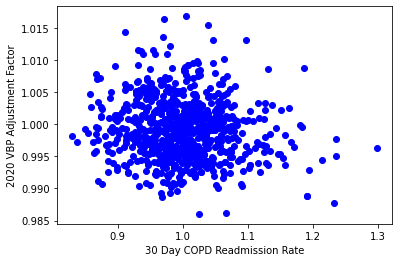

In [27]:
plt.scatter(x["READM-30-COPD-HRRP"], y, c = "b")
plt.xlabel("30 Day COPD Readmission Rate")
plt.ylabel("2020 VBP Adjustment Factor")